In [4]:
import pandas as pd
import numpy as np
import json

In [3]:
from IPython.display import display
pd.options.display.max_columns = None

In [75]:
df_clics= pd.read_csv("../data/colex/colex_clics3.csv")

## language information from Glottolog

In [150]:
file = "../data/languages/clics_languages_glotto.csv"
df = pd.read_csv(file)

In [158]:
df[df["Name"].str.contains("Artificial", na=False)]

,Glottocode,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment


In [159]:
df[df["Name"].str.contains("Creole", na=False)]

,Glottocode,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment
1301,sese1246,Seselwa Creole French,Indo-European,Africa,-4.62314,55.4503,"AES(ordinal=1, id='safe', name='not endangered..."
1331,jama1262,Jamaican Creole English,Indo-European,North America,18.13000,-77.2612,"AES(ordinal=3, id='definite', name='shifting',..."


In [160]:
df[df["Name"].str.contains("Pidgin", na=False)]

,Glottocode,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment


In [163]:
df[df["Name"]=="Lengua"]

,Glottocode,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment
1981,leng1262,Lengua,Lengua-Mascoy,South America,-22.6559,-58.9053,"AES(ordinal=3, id='definite', name='shifting',..."


In [151]:
# df_america= df[df["macroarea"].str.contains("America", na=False)]

In [152]:
# lang2lat=dict()
# lang2long=dict()
# for iso, lat, long in zip(df["glottocode"], df["latitude"], df["longitude"]):
#     lang2lat[iso]=lat
#     lang2long[iso]=long

In [153]:
# len(lang2lat)

In [12]:
# df_clics[df_clics["Glottocode_wals"].isin(lang2lat)].to_csv("../americas/colex.csv", index=False)


In [154]:
import os
os.getcwd()

'/Users/yiyichen/Documents/experiments/ColexPhon/notebooks'

In [17]:
# df_colex= pd.read_csv("../americas/colex_clics.csv")

## concepticon concepts to map to concreteness list

In [82]:
with open("../data/wordlists/conceptset.json") as f:
    concepts= json.load(f)

In [85]:
len(concepts["conceptset_labels"])

3967

### concreteness rating list

In [86]:
df_conc = pd.read_csv("../data/wordlists/concreteness_ratings.csv")

In [87]:
df_conc.head()

,Word,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX
0,a,0,1.46,1.14,2,30,0.93,1041179
1,aardvark,0,4.68,0.86,0,28,1.00,21
2,aback,0,1.65,1.07,4,27,0.85,15
3,abacus,0,4.52,1.12,2,29,0.93,12
4,abandon,0,2.54,1.45,1,27,0.96,413


In [88]:
conc_dict=dict(zip(df_conc["Word"].str.lower(), df_conc["Conc.M"]))
conc_sd_dict = dict(zip(df_conc["Word"].str.lower(), df_conc["Conc.SD"]))

In [89]:
id2concept = dict()
for concept , idx_ in concepts["conceptset_labels"].items():
    idx, _ = idx_
    id2concept[int(idx)]= concept.lower()

In [90]:
df_clics["Concept_x"]= df_clics["Concepticon_ID_x"].apply(lambda x: id2concept[x])
df_clics["Concept_y"]= df_clics["Concepticon_ID_y"].apply(lambda x: id2concept[x])

In [91]:
df_clics.columns

Index(['Form_ID_x', 'Form_ID_y', 'Concepticon_ID_x', 'Concepticon_ID_y',
       'Colex_ID', 'Language_ID', 'Parameter_ID', 'Value', 'Form',
       'Language_Name', 'Glottocode_clics', 'Glottolog_Name', 'ISO639P3code',
       'Macroarea', 'Family', 'Wals_ID', 'Wals_Name', 'Latitude', 'Longitude',
       'Glottocode_wals', 'Subfamily', 'Genus', 'Concept_x', 'Concept_y'],
      dtype='object')

In [92]:
def get_clean_concept(x):
    if "(" in x:
        pattern= "\(\w*?\)"
        
        m = re.findall(pattern, x)
        if m:
            x= x.replace(m[0], "").replace(" ", "").lower()
            return x
        else:
            return x
    else:
        return x

In [109]:
def get_conc(x):
    x = get_clean_concept(x)
    # deal with or
    if " or " in x:
        xs = x.split(" or ")
        concs =[]
        stds = []
        for x_ in xs:
            if x_ in conc_dict:
                concs.append(conc_dict[x_])
                stds.append(conc_sd_dict[x_])
        conc_m = np.mean(concs)
        conc_std = np.mean(stds)
        return pd.Series([conc_m, conc_std])
    else:
        if x in conc_dict:
            return pd.Series([conc_dict[x], conc_sd_dict[x]])
        else:
            return pd.Series([np.NaN, np.NaN])

In [72]:
get_conc("be dead or die")

[3.07]
3.07
0.0


In [73]:
get_conc("branch or twig")

[4.9, 4.75]
4.825
0.07500000000000018


In [110]:
df_clics[["Conc.M.x", "Conc.SD.x"]]=df_clics["Concept_x"].apply(lambda x: get_conc(x))
df_clics[["Conc.M.y", "Conc.SD.y"]]=df_clics["Concept_y"].apply(lambda x: get_conc(x))

# df_clics["Conc.M.y"]=df_clics["Concept_y"].apply(lambda x: get_conc[x])
# df_clics["Conc.SD.x"]=df_clics["Concept_x"].apply(lambda x: conc_sd_dict[x])
# df_clics["Conc.SD.y"]=df_clics["Concept_y"].apply(lambda x: conc_sd_dict[x])

/Users/yiyichen/anaconda3/envs/colexphon/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/yiyichen/anaconda3/envs/colexphon/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [113]:
df_clics["diff"]=df_clics["Concepticon_ID_x"]!=df_clics["Concepticon_ID_y"]

In [118]:
df_clics[df_clics["diff"]==True].columns

Index(['Form_ID_x', 'Form_ID_y', 'Concepticon_ID_x', 'Concepticon_ID_y',
       'Colex_ID', 'Language_ID', 'Parameter_ID', 'Value', 'Form',
       'Language_Name', 'Glottocode_clics', 'Glottolog_Name', 'ISO639P3code',
       'Macroarea', 'Family', 'Wals_ID', 'Wals_Name', 'Latitude', 'Longitude',
       'Glottocode_wals', 'Subfamily', 'Genus', 'Concept_x', 'Concept_y',
       'Conc.M.x', 'Conc.SD.x', 'Conc.M.y', 'Conc.SD.y', 'diff'],
      dtype='object')

In [123]:
lang2lat["chao1238"]

23.666667

In [125]:
lang2lat = {k:v for k,v in lang2lat.items() if pd.notna(v)}
lang2long = {k:v for k,v in lang2long.items() if pd.notna(v)}


In [130]:
df_clics["Latitude"] = df_clics["Glottocode_clics"].apply(lambda x: lang2lat.get(x,x))
df_clics["Longitude"]= df_clics["Glottocode_clics"].apply(lambda x:lang2long.get(x,x))

In [165]:
df_new = df_clics[["Form_ID_x", "Form_ID_y", "Concepticon_ID_x", "Concepticon_ID_y", "Value", "Form", "Concept_x", "Concept_y", "Conc.M.x", "Conc.M.y", "Conc.SD.x", "Conc.SD.y", "Glottocode_clics", "diff", "ISO639P3code"]]

In [169]:
df_new.rename(columns={"Glottocode_clics":"Glottocode"}, inplace=True)

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_92861/2412446148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns={"Glottocode_clics":"Glottocode"}, inplace=True)


In [170]:
df_merge = pd.merge(df_new, df, how="left", on=["Glottocode"])

In [226]:
len(set(df_merge["Glottocode"].tolist()))

1989

# Correlations
## the concepts closer in concretness are more probable to colexify

In [2]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
import json
from collections import Counter, defaultdict

from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [174]:
df_merge["ConcDist"] = df_merge["Conc.M.x"]-df_merge["Conc.M.y"]
df_merge["ConcDist"] = df_merge["ConcDist"].abs()

In [211]:
df_merge.to_csv("../data/colex/colex_clics3_glottolog.csv", index=False)

In [5]:
df_merge= pd.read_csv("../data/colex/colex_clics3_glottolog.csv")

In [8]:
df=df_merge

In [13]:
df[(df["Concept_x"]=="sun") &(df["Concept_y"]=="year")]

,Form_ID_x,Form_ID_y,Concepticon_ID_x,Concepticon_ID_y,Value,Form,Concept_x,Concept_y,Conc.M.x,Conc.M.y,Conc.SD.x,Conc.SD.y,Glottocode,diff,ISO639P3code,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment,ConcDist,COLEX
53979,65500-221_year-1,65500-120_sun-1,1343,1226,kwat,kwat,sun,year,4.83,3.25,0.6,1.32,kama1373,True,kay,Kamayurá,Tupian,South America,-12.26610,-53.46510,"AES(ordinal=3, id='definite', name='shifting',...",1.58,sun~year
53980,278-14-730-1,278-1-520-1,1343,1226,βari,βari,sun,year,4.83,3.25,0.6,1.32,pano1254,True,knt,Panoan Katukína,Pano-Tacanan,South America,-7.97456,-71.56151,"AES(ordinal=3, id='definite', name='shifting',...",1.58,sun~year
53981,291-14-730-1,291-1-520-1,1343,1226,tena,tena,sun,year,4.83,3.25,0.6,1.32,siri1273,True,srq,Sirionó,Tupian,South America,-15.52980,-63.96880,"AES(ordinal=5, id='critical', name='nearly ext...",1.58,sun~year
53982,292-14-730-1,292-1-520-1,1343,1226,kwalaɨ,kwalaɨ,sun,year,4.83,3.25,0.6,1.32,waya1270,True,oym,Wayampi,Tupian,South America,1.73817,-52.68870,"AES(ordinal=3, id='definite', name='shifting',...",1.58,sun~year
53983,kor-457_year-1,kor-57_sun-1,1343,1226,해,hɛ,sun,year,4.83,3.25,0.6,1.32,kore1280,True,kor,Korean,Koreanic,Eurasia,37.54000,126.98000,"AES(ordinal=1, id='safe', name='not endangered...",1.58,sun~year


### 1. only colexifications and conconcreteness distance

In [6]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
import json
from collections import Counter, defaultdict

from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)
import scipy.stats

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [178]:
df_merge["COLEX"]= df_merge["Concept_x"]+"~"+df_merge["Concept_y"]

In [180]:
colex_condist = dict(zip(df_merge["COLEX"],df_merge["ConcDist"]))

In [185]:
df_colex_concdist = pd.DataFrame.from_dict(colex_condist, orient="index").dropna()

In [189]:
df_colex_concdist.rename(columns={0:"ConcDist"}, inplace=True)

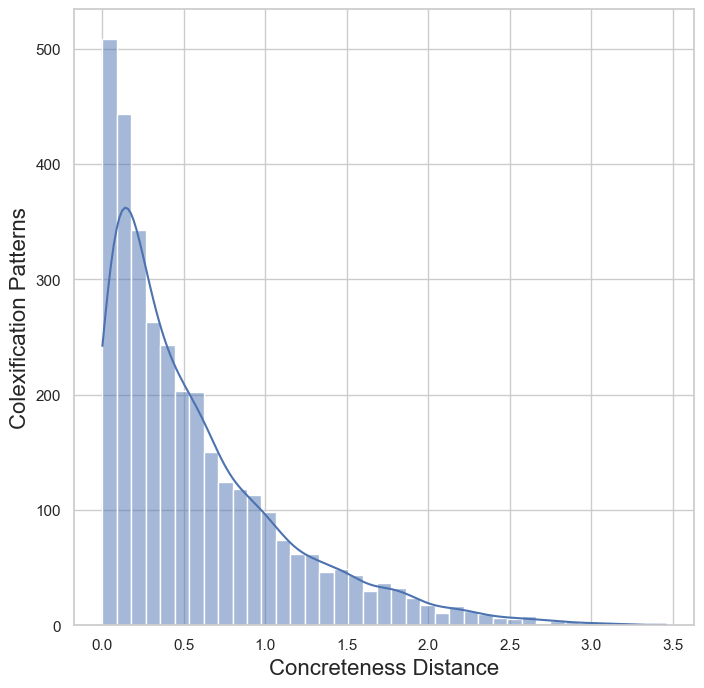

In [212]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style("whitegrid")

b= sns.histplot(data=df_colex_concdist, x="ConcDist", kde=True)
b.set_xlabel("Concreteness Distance", fontsize=16)
b.set_ylabel("Colexification Patterns", fontsize=16)
fig = b.get_figure()
fig.savefig("../data/images/clics3_concdist_colex_patterns.png")

In [213]:
def correlation(X_df):
    X = X_df.index.values
    print(X.shape)
    Y = X_df["#COLEX"].values
    print(Y.shape)
    pearsonr = scipy.stats.pearsonr(X,Y)
    print("correlation:", pearsonr)
    
    sns.lmplot(x="ConcDist", y="#COLEX", data=X_df, lowess=True, line_kws={"color":"red"})
    
#     slope, intercept, r, p, stderr = scipy.stats.linregress(X,Y)
#     line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
#     plots_linear(X,Y, slope, intercept, r, p, stderr,line)

In [214]:
df_colex_concdist["COLEX"]=df_colex_concdist.index
X_df = pd.DataFrame.from_dict(df_colex_concdist.groupby("ConcDist").agg("count")["COLEX"].to_dict(), orient="index").rename(columns={0:"#COLEX"})
X_df["ConcDist"]=X_df.index

(701,)
(701,)
correlation: PearsonRResult(statistic=-0.3843198108855552, pvalue=4.296530003695257e-26)


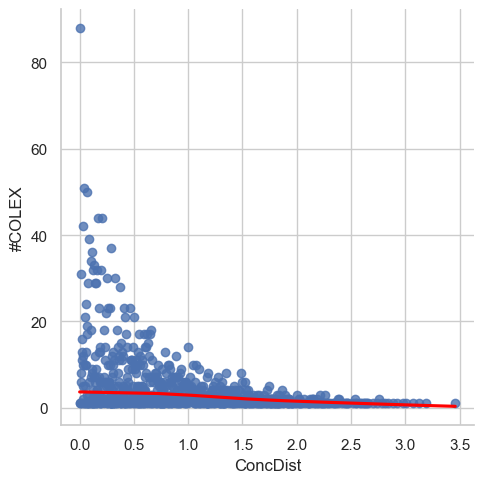

In [218]:
correlation(X_df)

<Axes: xlabel='ConcDist', ylabel='Count'>

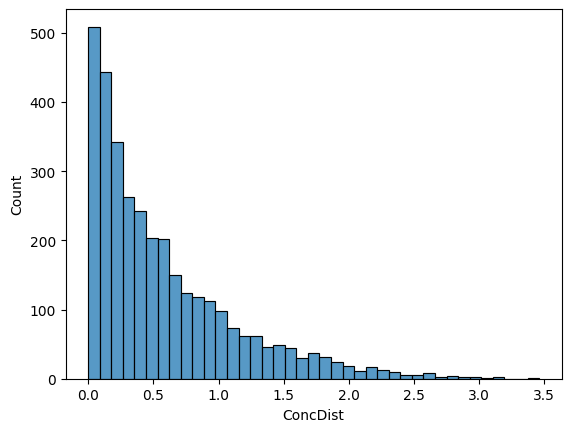

In [190]:

sns.histplot(data=df_colex_concdist, x="ConcDist")

In [215]:
df_colex_concdist.head()

,ConcDist,COLEX
earth (soil)~mud,0.06,earth (soil)~mud
earth (soil)~dust,0.40,earth (soil)~dust
earth (soil)~sand,0.20,earth (soil)~sand
earth (soil)~ash,0.16,earth (soil)~ash
earth (soil)~dirty,0.57,earth (soil)~dirty


### 2. all colexifications (including different forms) and their concreteness

In [192]:
len(df_merge), len(df_merge.drop_duplicates(["COLEX", "Glottocode"]))

(76346, 66827)

<Axes: xlabel='ConcDist', ylabel='Count'>

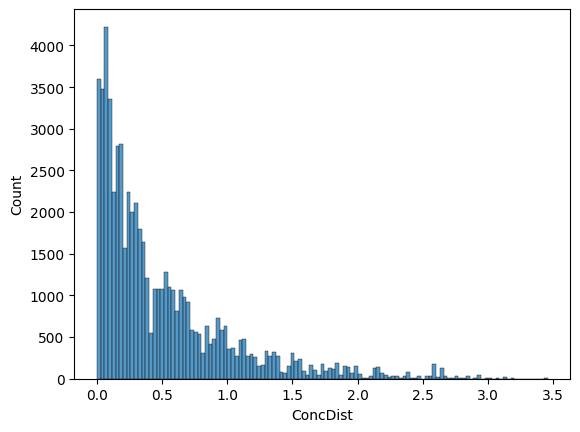

In [195]:
sns.histplot(data=df_merge, x="ConcDist")

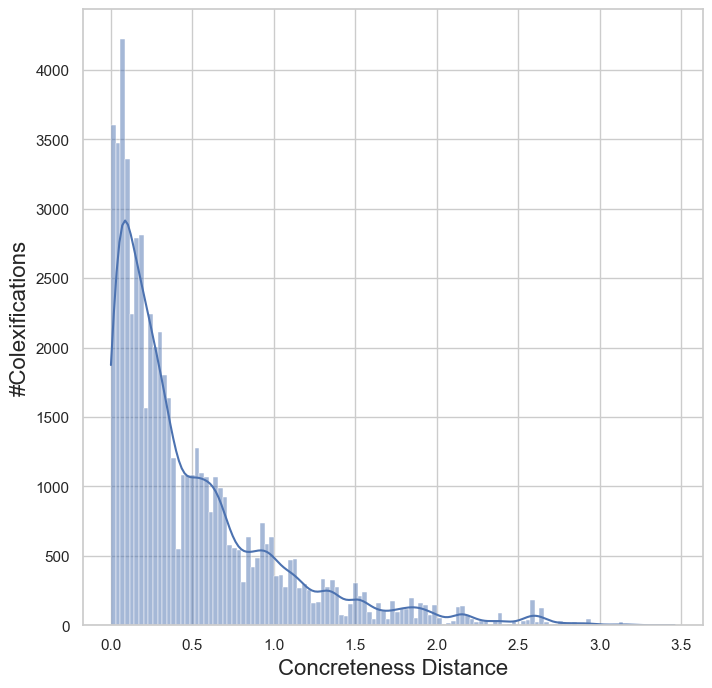

In [219]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style("whitegrid")

b= sns.histplot(data=df_merge, x="ConcDist", kde=True)
b.set_xlabel("Concreteness Distance", fontsize=16)
b.set_ylabel("#Colexifications", fontsize=16)
fig = b.get_figure()
fig.savefig("../data/images/clics3_concdist_all_colex.png")

In [220]:
X_all = pd.DataFrame.from_dict(df_merge.groupby("ConcDist").agg("count")["COLEX"].to_dict(), orient="index").rename(columns={0:"#COLEX"})
X_all["ConcDist"]=X_all.index

(701,)
(701,)
correlation: PearsonRResult(statistic=-0.35001068806378066, pvalue=1.2436867510402552e-21)


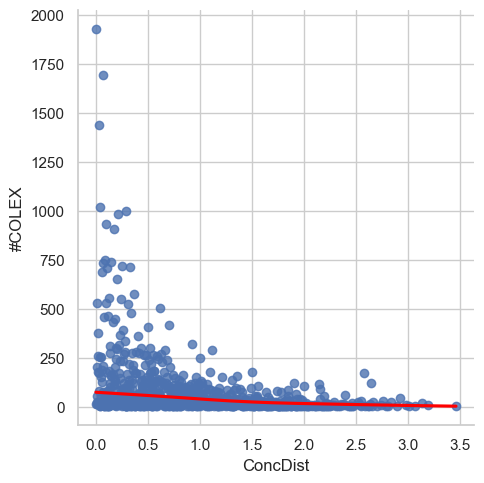

In [221]:
correlation(X_all)

In [198]:
df_merge

,Form_ID_x,Form_ID_y,Concepticon_ID_x,Concepticon_ID_y,Value,Form,Concept_x,Concept_y,Conc.M.x,Conc.M.y,Conc.SD.x,Conc.SD.y,Glottocode,diff,ISO639P3code,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment,ConcDist,COLEX
0,Chaozhou-61_soilearth-1,Chaozhou-60_mudearth-1,1228,640,tʰou⁵⁵,tʰou⁵⁵,earth (soil),mud,4.8,4.86,0.55,0.44,chao1238,True,NaN,Chaozhou,Sino-Tibetan,Eurasia,23.666667,116.633333,NaN,0.06,earth (soil)~mud
1,Chengdu-61_soilearth-1,Chengdu-60_mudearth-1,1228,640,ȵi³¹pa⁴⁴,ȵi³¹pa⁴⁴,earth (soil),mud,4.8,4.86,0.55,0.44,chen1267,True,NaN,Chengdu Mandarin,Sino-Tibetan,Eurasia,30.605768,103.970947,NaN,0.06,earth (soil)~mud
2,Fuzhou-61_soilearth-1,Fuzhou-60_mudearth-1,1228,640,tʰu⁵²,tʰu⁵²,earth (soil),mud,4.8,4.86,0.55,0.44,fuzh1239,True,NaN,Houguan,Sino-Tibetan,Eurasia,26.089040,119.294243,NaN,0.06,earth (soil)~mud
3,Guangzhou-61_soilearth-1,Guangzhou-60_mudearth-1,1228,640,nɐi²¹,nɐi²¹,earth (soil),mud,4.8,4.86,0.55,0.44,guan1279,True,NaN,Guangzhou,Sino-Tibetan,Eurasia,23.125350,112.947655,NaN,0.06,earth (soil)~mud
4,Meixian-61_soilearth-1,Meixian-60_mudearth-1,1228,640,nɛ¹²,nɛ¹²,earth (soil),mud,4.8,4.86,0.55,0.44,yuet1238,True,NaN,Meixian,Sino-Tibetan,Eurasia,24.352296,115.890338,NaN,0.06,earth (soil)~mud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76341,alor1247-bana-ringworm-1,alor1247-bana-tinea-1,3173,3171,naɔ,naɔ,tinea,ringworm,NaN,4.50,NaN,1.01,alor1247,True,aol,Alorese,Austronesian,Papunesia,-8.203820,124.264000,"AES(ordinal=1, id='safe', name='not endangered...",NaN,tinea~ringworm
76342,atim1239-ringworm-1,atim1239-tinea-1,3173,3171,kaˈfisiŋ,kaˈfisiŋ,tinea,ringworm,NaN,4.50,NaN,1.01,atim1239,True,abz,Atimelang,Timor-Alor-Pantar,Papunesia,NaN,NaN,NaN,NaN,tinea~ringworm
76343,kara1499-ringworm-1,kara1499-tinea-1,3173,3171,jes,jes,tinea,ringworm,NaN,4.50,NaN,1.01,kara1499,True,kgv,Kalamang,West Bomberai,Papunesia,-3.470370,132.678000,"AES(ordinal=3, id='definite', name='shifting',...",NaN,tinea~ringworm
76344,kelo1247-hopte-ringworm-1,kelo1247-hopte-tinea-1,3173,3171,kat,kat,tinea,ringworm,NaN,4.50,NaN,1.01,kelo1247,True,kyo,Klon,Timor-Alor-Pantar,Papunesia,-8.406880,124.429000,"AES(ordinal=3, id='definite', name='shifting',...",NaN,tinea~ringworm


### 3. count colexification by languages and their concreteness

In [ ]:
colex_condist

In [200]:

colex_lang_counter = defaultdict(dict)
for lang, colex in zip(df_merge["Glottocode"], df_merge["COLEX"]):
    if colex not in colex_lang_counter:
        colex_lang_counter[colex]=defaultdict(int)
    
    colex_lang_counter[colex][lang]+=1
    

In [202]:
langs_len = len(list(set(df_merge["Glottocode"])))

In [203]:
langs_len

1989

In [204]:
colex_langs = {k:len(v) for k,v in colex_lang_counter.items()}

In [205]:
colex_langs

{'earth (soil)~mud': 16,
 'earth (soil)~dust': 25,
 'earth (soil)~sand': 41,
 'earth (soil)~ash': 6,
 'earth (soil)~dirty': 9,
 'earth (soil)~field': 15,
 'earth (soil)~land': 151,
 'earth (soil)~country': 61,
 'earth (soil)~mainland': 27,
 'earth (soil)~world': 64,
 'earth (soil)~island': 9,
 'earth (soil)~place (position)': 13,
 'earth (soil)~plain': 5,
 'earth (soil)~clay': 47,
 'earth (soil)~floor': 57,
 'earth (soil)~down or below': 5,
 'earth (soil)~adobe': 3,
 'earth (soil)~ground': 69,
 'earth (soil)~area': 8,
 'earth (soil)~raining or rain': 3,
 'dust~ash': 79,
 'dust~cloud': 3,
 'dust~sand': 7,
 'dust~smoke (exhaust)': 22,
 'dust~fog': 13,
 'dust~clay': 5,
 'dust~land': 6,
 'dust~mud': 4,
 'dust~flour': 5,
 'mud~dirty': 8,
 'mud~shore': 3,
 'mud~clay': 62,
 'mud~mortar binder': 3,
 'mud~adobe': 5,
 'mud~swamp': 12,
 'mountain or hill~top': 13,
 'mountain or hill~stone or rock': 9,
 'mountain or hill~precipice': 8,
 'precipice~stone or rock': 53,
 'precipice~reef': 5,
 'precip

In [206]:
df_colex_lang= pd.DataFrame.from_dict(colex_langs, orient="index")
df_colex_lang.columns = ["langs"]
df_colex_lang["COLEX"] = df_colex_lang.index
df_colex_lang["ConcDist"] = df_colex_lang["COLEX"].parallel_apply(lambda x: colex_condist[x])

In [208]:
df_colex_lang

,langs,COLEX,ConcDist
earth (soil)~mud,16,earth (soil)~mud,0.06
earth (soil)~dust,25,earth (soil)~dust,0.40
earth (soil)~sand,41,earth (soil)~sand,0.20
earth (soil)~ash,6,earth (soil)~ash,0.16
earth (soil)~dirty,9,earth (soil)~dirty,0.57
...,...,...,...
machine~motor,5,machine~motor,0.59
government~president,3,government~president,1.52
carcass~dead,3,carcass~dead,0.39
same-sex older sibling~same-sex younger sibling,4,same-sex older sibling~same-sex younger sibling,NaN


<Axes: xlabel='ConcDist', ylabel='Count'>

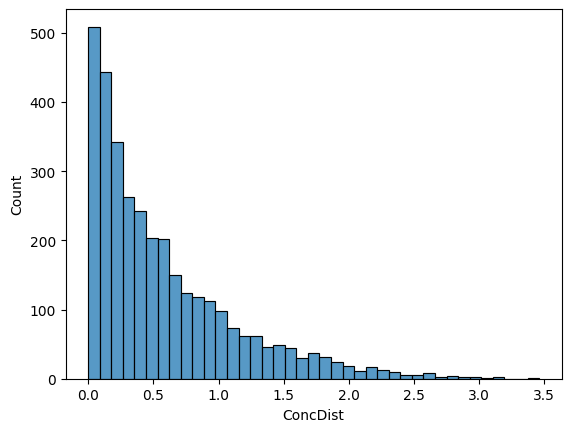

In [209]:
sns.histplot(data= df_colex_lang, x="ConcDist")

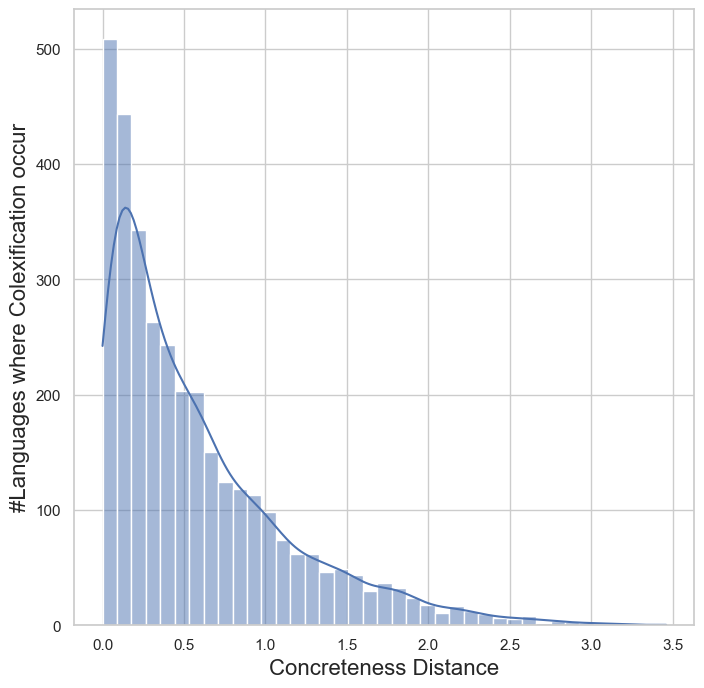

In [222]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style("whitegrid")

b= sns.histplot(data=df_colex_lang, x="ConcDist", kde=True)
b.set_xlabel("Concreteness Distance", fontsize=16)
b.set_ylabel("#Languages where Colexification occur", fontsize=16)
fig = b.get_figure()
fig.savefig("../data/images/clics3_concdist_langs_colex.png")

In [223]:
X_langs = pd.DataFrame.from_dict(df_colex_lang.groupby("ConcDist")["langs"].agg("sum").to_dict(), orient="index").rename(columns={0:"#LANGS"})
X_langs["ConcDist"]=X_langs.index


In [224]:
def correlation(X_df):
    sns.set(rc={'figure.figsize':(20,20)})
    X = X_df.index.values
    print(X.shape)
    Y = X_df["#LANGS"].values
    print(Y.shape)
    pearsonr = scipy.stats.pearsonr(X,Y)
    print("correlation:", pearsonr)
    
    sns.lmplot(x="ConcDist", y="#LANGS", data=X_df, line_kws={"color":"pink"})
    
#     slope, intercept, r, p, stderr = scipy.stats.linregress(X,Y)
#     line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
#     plots_linear(X,Y, slope, intercept, r, p, stderr,line)

(701,)
(701,)
correlation: PearsonRResult(statistic=-0.3537284388316944, pvalue=4.334939699211407e-22)


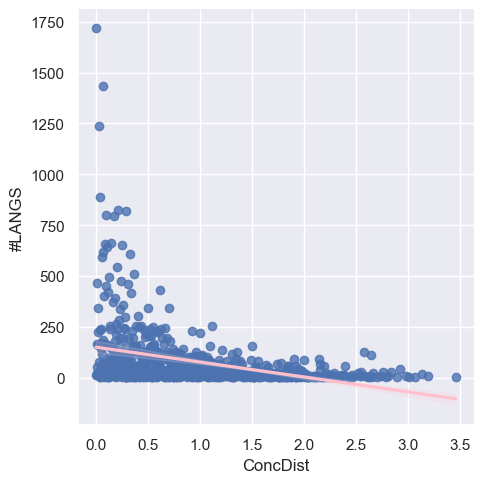

In [225]:
correlation(X_langs)